<a href="https://www.kaggle.com/code/fernandolima23/predicting-stellar-ages-with-neural-networks?scriptVersionId=233546658" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import AutoMinorLocator
import seaborn as sbn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import keras
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from keras.models import Sequential
from keras.layers import Dense, Dropout
import warnings
warnings.filterwarnings("ignore")

# 2. Reading the data

In [2]:
Data = pd.read_csv("../input/physical-parameters-of-cool-solartype-stars/Physical_parameters_.csv")
pd.set_option("display.max_columns", len(Data.columns))
Data.head()

,Star,Teff,e_Teff,logg,e_logg,Vt,e_Vt,[Fe/H],e_[Fe/H],Mass,e_Mass,Age,e_Age
0,HD 55,4554,88,4.54,0.21,0.06,1.63,-0.67,0.01,,,4.531,3.824
1,HD 142,6431,123,4.82,0.11,2.10,0.28,0.05,0.08,1.230,0.033,1.120,0.904
2,HD 283,5135,24,4.49,0.07,0.47,0.06,-0.55,0.01,0.717,0.015,5.167,4.107
3,HD 361,5888,14,4.54,0.08,1.03,0.03,-0.13,0.01,1.029,0.011,0.356,0.283
4,HD 750,5069,32,4.33,0.10,0.66,0.07,-0.30,0.02,0.752,0.017,4.825,4.118


# 3. Data Preprocessing

In [3]:
Data.drop(["Star"], axis = 1, inplace = True)

In [4]:
Data[Data == "     "] = np.nan
Data[Data == "      "] = np.nan

# 3.1 Dtypes

In [5]:
Data.dtypes

Teff          int64
e_Teff        int64
logg        float64
e_logg      float64
Vt          float64
e_Vt        float64
[Fe/H]      float64
e_[Fe/H]    float64
Mass         object
e_Mass       object
Age          object
e_Age       float64
dtype: object

In [6]:
Data["Mass"] = Data["Mass"].astype(float)
Data["e_Mass"] = Data["e_Mass"].astype(float)
Data["Age"] = Data["Age"].astype(float)
Data["e_Age"] = Data["e_Age"].astype(float)

# 3.2 Missing data

In [7]:
Data.isnull().sum()/len(Data["Age"])

Teff        0.000000
e_Teff      0.000000
logg        0.000000
e_logg      0.000000
Vt          0.000000
e_Vt        0.000000
[Fe/H]      0.000000
e_[Fe/H]    0.000000
Mass        0.022173
e_Mass      0.022173
Age         0.011086
e_Age       0.011086
dtype: float64

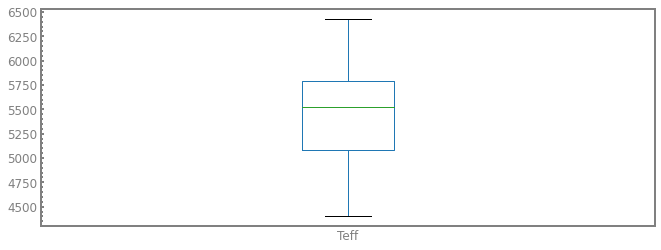

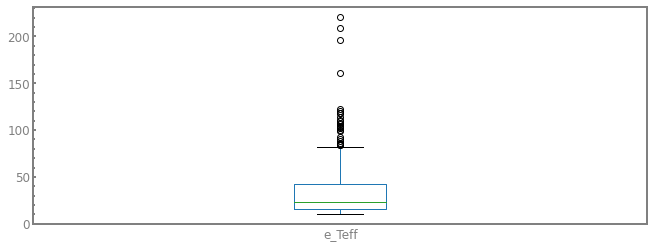

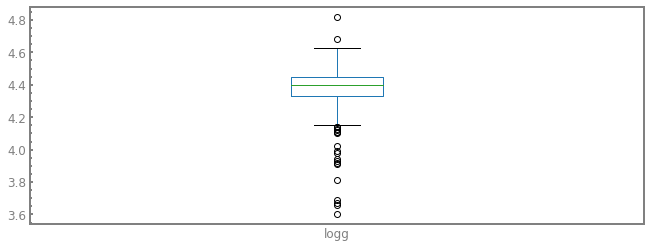

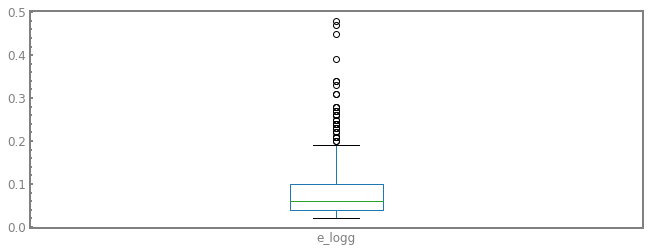

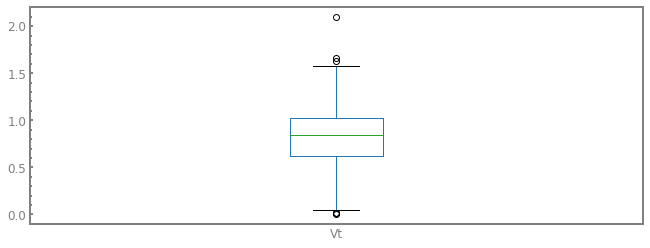

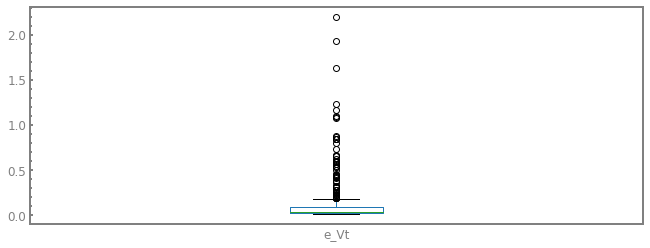

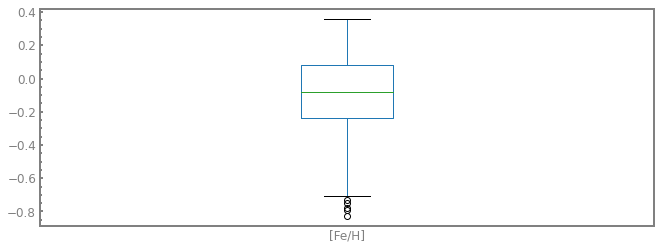

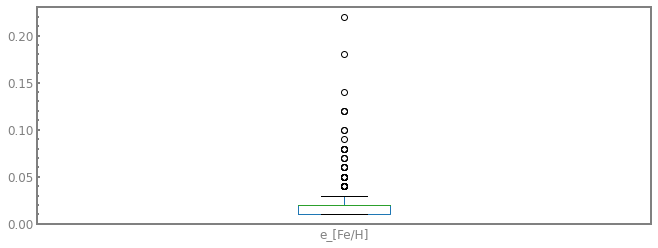

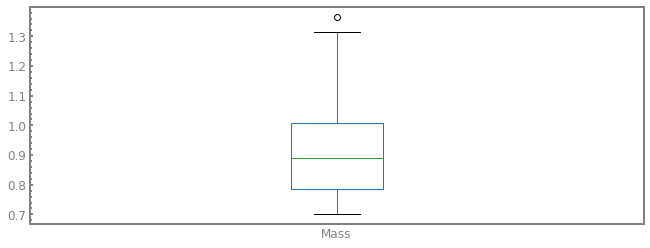

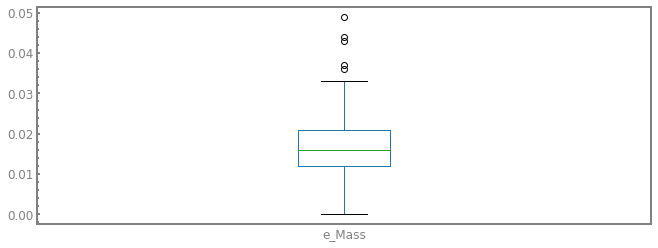

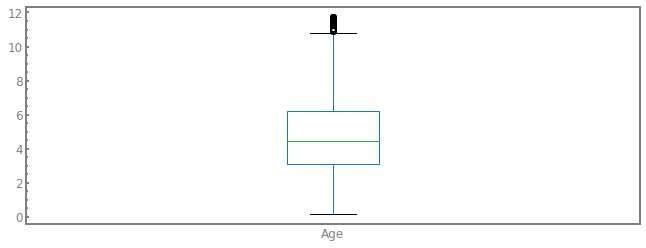

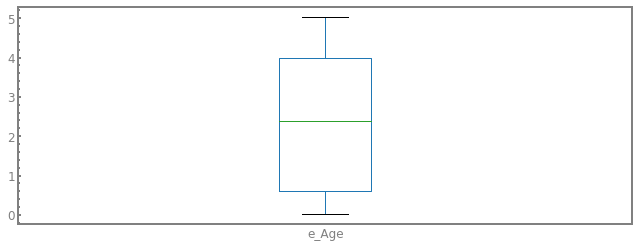

In [8]:
Font1 = {"family":"serif", "weight": "bold", "size": 12, "color":"gray"}
for i in Data.columns:
    fig, ax = plt.subplots(figsize=(11,4))
    Data.boxplot(column = i, grid = False, fontsize=12)
    fig.patch.set_facecolor("white")
    for axis in ["left", "right", "top", "bottom"]:
        ax.spines[axis].set_linewidth(2)
        ax.spines[axis].set_color("gray")
    ax.xaxis.set_minor_locator(AutoMinorLocator())    
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(axis = "both", direction = "in", labelcolor = "gray", labelsize = 12, bottom = False)
    ax.tick_params(which = "minor", direction = "in", width = 2, color = "gray", bottom = False)
    ax.tick_params(which = "major", direction = "in", color = "gray", length=3.4, width = 2, bottom = False)
    plt.show()

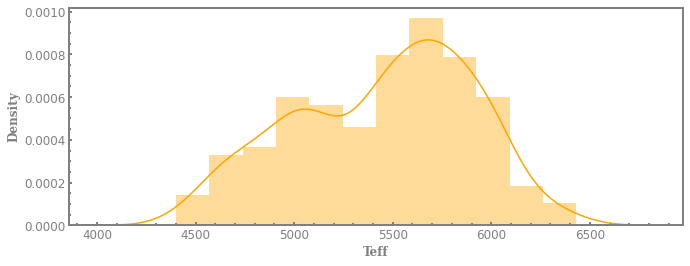

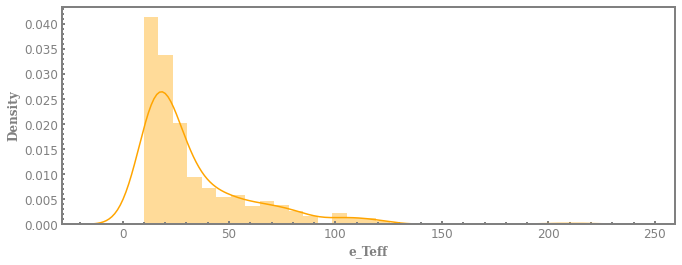

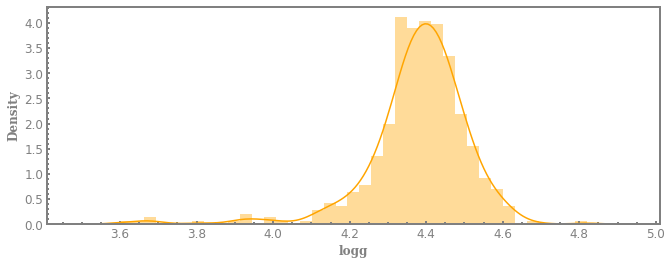

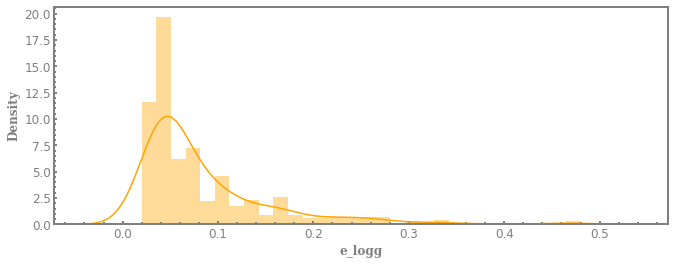

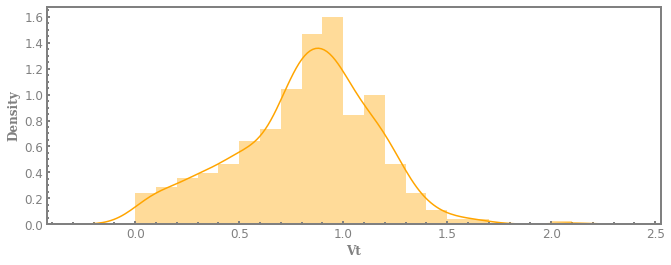

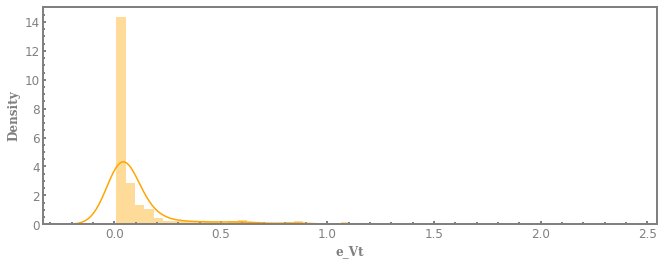

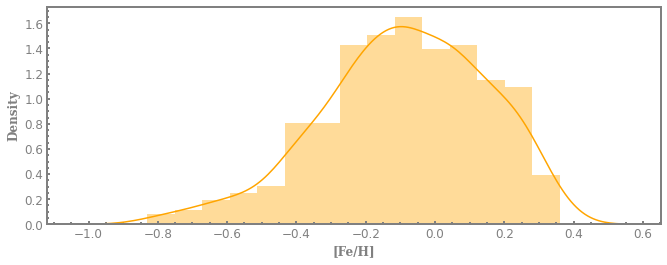

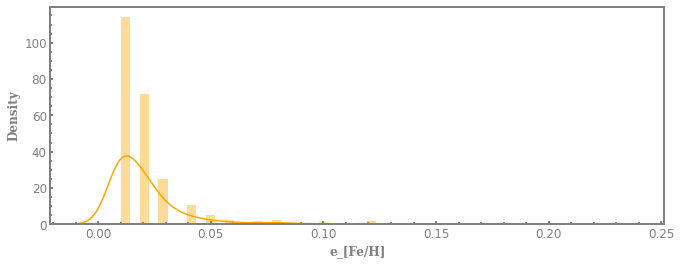

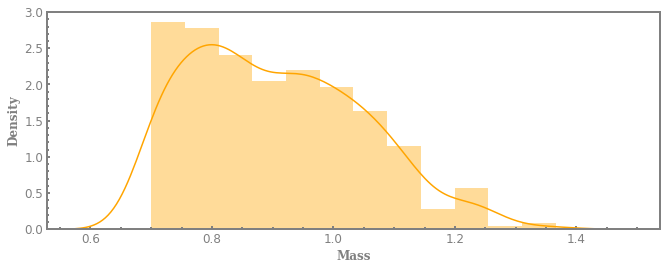

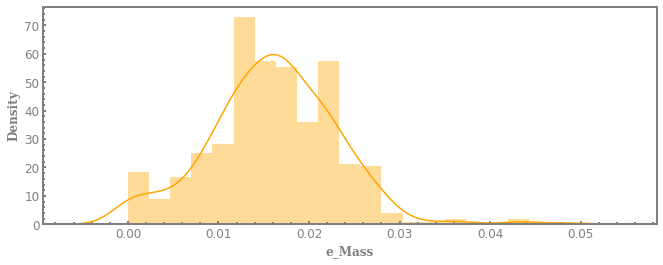

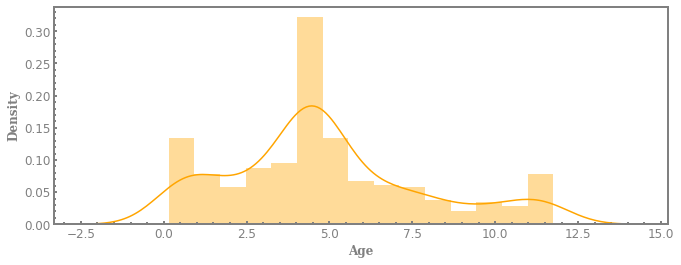

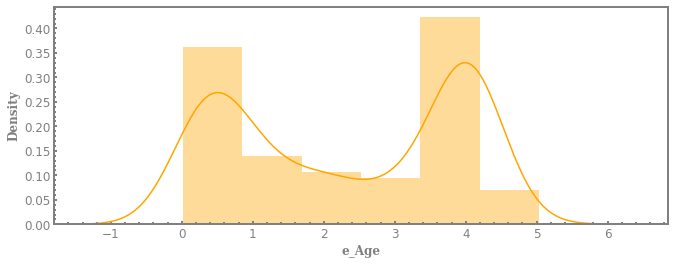

In [9]:
for i in Data.columns:
    fig, ax = plt.subplots(figsize=(11,4))
    sbn.distplot(Data[i], color = "orange")
    fig.patch.set_facecolor("white")
    for axis in ["left", "right", "top", "bottom"]:
        ax.spines[axis].set_linewidth(2)
        ax.spines[axis].set_color("gray")
    ax.xaxis.set_minor_locator(AutoMinorLocator())    
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(axis = "both", direction = "in", labelcolor = "gray", labelsize = 12)
    ax.tick_params(which = "minor", direction = "in", width = 2, color = "gray")
    ax.tick_params(which = "major", direction = "in", color = "gray", length=3.4, width = 2)
    ax.set_xlabel(f"{i}", fontdict = Font1)
    ax.set_ylabel("Density", fontdict = Font1)
    plt.show()

In [10]:
Data["Mass"] = Data["Mass"].fillna(Data["Mass"].mean())
Data["e_Mass"] = Data["e_Mass"].fillna(Data["e_Mass"].mean())
Data["Age"] = Data["Age"].fillna(Data["Age"].mean())
Data["e_Age"] = Data["e_Age"].fillna(Data["e_Age"].mean())

# 3.3 Correlation

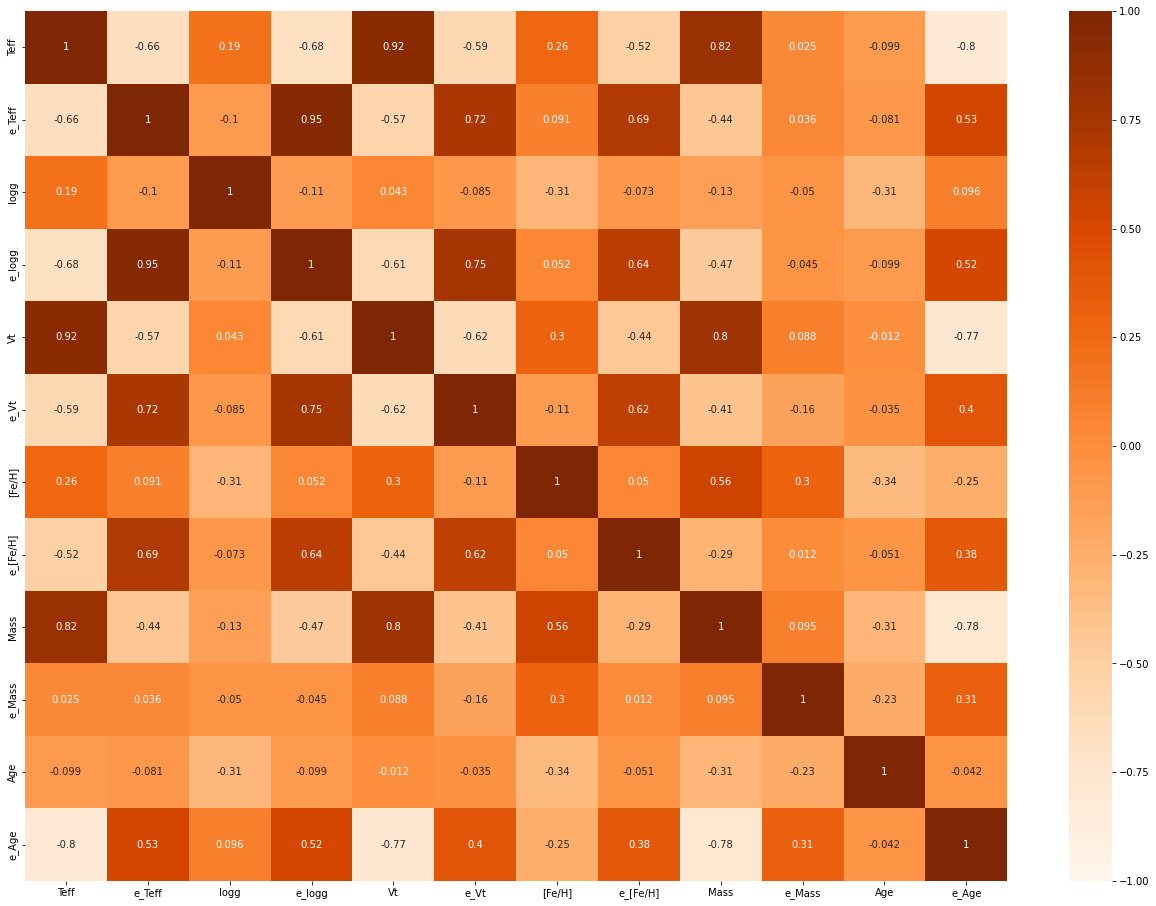

In [11]:
plt.figure(figsize = (22, 16))
sbn.heatmap(Data.corr(), annot = True, vmin = -1, cmap = "Oranges")
plt.show()

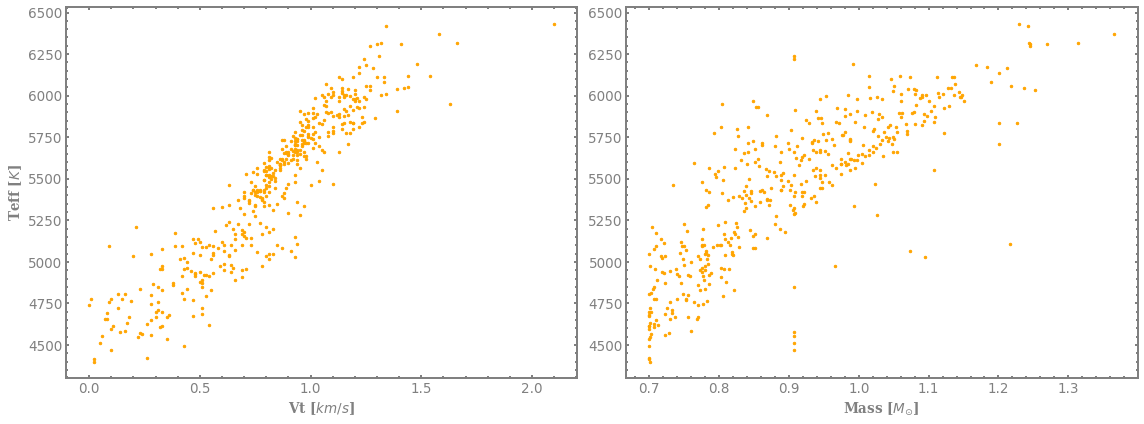

In [12]:
Font1 = {"family": "serif", "weight": "bold", "color": "gray", "size": 13.5}
Font2 = FontProperties(family = "serif",
                      weight = "bold",
                      style = "normal",
                      size = 13)
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6))
axs[0].scatter(Data["Vt"], Data["Teff"], s = 6, c = "orange")
axs[1].scatter(Data["Mass"], Data["Teff"], s = 6, c = "orange")
axs[0].set_xlabel("Vt [$km/s$]", fontdict = Font1)
axs[1].set_xlabel("Mass [$M_{\odot}$]", fontdict = Font1)
axs[0].set_ylabel("Teff [$K$]", fontdict = Font1)
for i in range(0, 2):
    for axis in ["left", "right", "top", "bottom"]:
        axs[i].spines[axis].set_linewidth(2)
        axs[i].spines[axis].set_color("gray")
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())
    axs[i].tick_params(axis = "both", direction = "in", labelcolor = "gray", labelsize = 13.5, top = True, right = True, left = True, bottom = True)
    axs[i].tick_params(which='minor', direction = "in", length=2, color='gray', width = 2, top = True, right = True, left = True, bottom = True)
    axs[i].tick_params(which='major', direction = "in", color='gray', length=3.4, width = 2, top = True, right = True, left = True, bottom = True)
fig.patch.set_facecolor("white")
fig.tight_layout()
plt.show()

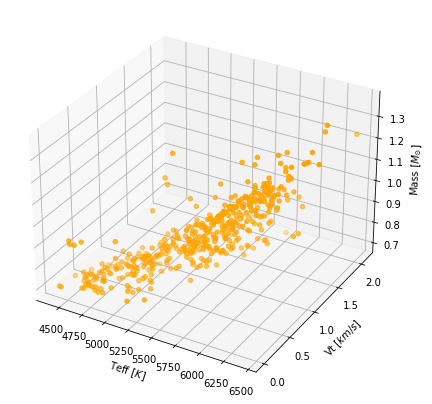

In [13]:
fig = plt.figure(figsize = (7, 10))
ax = fig.add_subplot(projection = "3d")
ax.scatter(Data["Teff"], Data["Vt"], Data["Mass"], c = "orange")
ax.set_xlabel("Teff [$K$]")
ax.set_ylabel("Vt [$km/s$]")
ax.set_zlabel("Mass [$M_{\odot}$]")
fig.patch.set_facecolor("white")
plt.show()

# 3.4 Data split

In [14]:
x = Data.drop(["Age"], axis = 1)
x_copy = x.copy()
Norm = MinMaxScaler(feature_range = (0, 1))
x = Norm.fit_transform(x)
x = pd.DataFrame(x, columns = x_copy.columns)
y = Data["Age"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [15]:
x.shape

(451, 11)

In [16]:
x.shape[1]

11

# 4. Neural networks 

In [17]:
Model = Sequential()
Model.add(Dense(30, input_dim = x.shape[1], kernel_initializer = "normal", activation = "relu"))
Model.add(Dense(30, kernel_initializer = "normal", activation = "relu"))
Model.add(Dropout(0.2))
Model.add(Dense(1, kernel_initializer = "normal", activation = "linear"))

In [18]:
optimizer1 = Adam()
optimizer2 = RMSprop()
optimizer3 = SGD()
Model.compile(loss = "mean_squared_error", optimizer = optimizer1, metrics = ["mae"])
history = Model.fit(x_train, y_train, epochs = 2000, batch_size = 200, validation_data=(x_test, y_test), verbose = 0)

In [19]:
mae_test = history.history["val_mae"]
min(mae_test)

0.5361997485160828

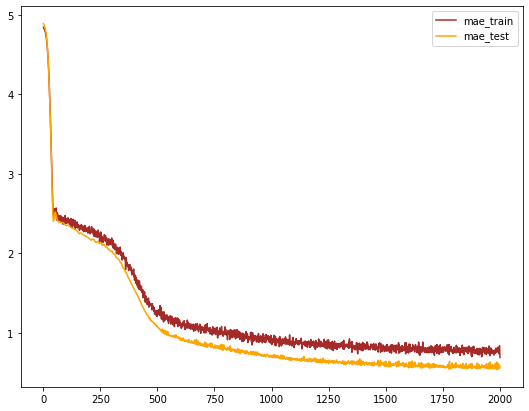

In [20]:
fig, axs = plt.subplots(figsize = (9, 7))
mae_train = history.history["mae"]
Epochs = range(1, len(mae_train) + 1)
axs.plot(Epochs, mae_train, color = "brown", label = "mae_train")
axs.plot(Epochs, mae_test, color = "orange", label = "mae_test")
plt.legend()
fig.patch.set_color("white")
plt.show()